In [1]:
import pandas as pd
import numpy as py
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
x_data = pd.DataFrame(pd.read_csv('./Methylation.csv',header=0,index_col=66)) 

c:\users\23303\pycharmprojects\deel\venv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
x_data.shape

(663828, 66)

In [5]:
x_data.head()

,047,048,049,050,014,015,019,025,030,032,...,061,062,71,063,064,066,067,068,069,070
UCSC_RefGene_Name,ZPQ,ZL,HJ,XRE,YLK,LWG,LZY,YH,WFF,LQG,...,LPT,WHB,LYH,LLP,WBL,MHG,LXZ,NX,LX,WRY
PTPRS,0.939358638,0.932434087,0.948112616,0.939991017,0.862317569,0.950550763,0.937284138,0.951384892,0.928327357,0.93947409,...,0.949875815,0.943876912,0.933197703,0.913717822,0.932399674,0.952442836,0.924620177,0.931023226,0.934795515,0.941320698
ITPK1,0.030046451,0.016749009,0.023318525,0.019263045,0.024858933,0.010292215,0.026103025,0.010177044,0.124717897,0.040341021,...,0.012166418,0.024285992,0.022533176,0.016339051,0.021165142,0.016313082,0.013759298,0.027269948,0.008737204,0.011893034
JARID2,0.018400715,0.012394616,0.01303935,0.015816588,0.02114024,0.008638881,0.012000161,0.008537647,0.008195402,0.010201524,...,0.01540188,0.008074784,0.020028818,0.009835352,0.00974126,0.015745958,0.01512313,0.014067063,0.011909806,0.010303821
JARID2,0.018400715,0.012394616,0.01303935,0.015816588,0.02114024,0.008638881,0.012000161,0.008537647,0.008195402,0.010201524,...,0.01540188,0.008074784,0.020028818,0.009835352,0.00974126,0.015745958,0.01512313,0.014067063,0.011909806,0.010303821


In [4]:
#去除重复数据
x_data = x_data.drop_duplicates(keep='first')

In [5]:
x_data.shape

(598244, 66)

In [6]:
#以病人的id作为列索引.从第2行开始读取
x_id = x_data.iloc[1:]

In [7]:
#转置
x_reshape=x_id.T

In [8]:
x_reshape.shape

(66, 598243)

In [9]:
x_reshape.head()

,PTPRS,ITPK1,JARID2,NBPF20,MORF4L1,TBC1D24,OR8G1,PCSK2,PHIP,FAM212B,...,EDARADD,EMP2,BANP,TBCD,RNPS1,CHST6,SLC38A2,6-Mar,SYNJ1,NTN5
047,0.939358638,0.030046451,0.018400715,0.97252672,0.725564722,0.900509671,0.981647151,0.916480236,0.978412943,0.494819711,...,0.00482993,0.968172,0.902462,0.910461,0.733044,0.315276,0.00950484,0.00968838,0.749168,0.963387
048,0.932434087,0.016749009,0.012394616,0.947042586,0.359462468,0.913342585,0.976811811,0.744905622,0.971850999,0.620048093,...,0.00750436,0.964142,0.789957,0.88849,0.732056,0.414313,0.0063113,0.0066306,0.79246,0.952832
049,0.948112616,0.023318525,0.01303935,0.970545077,0.664358528,0.817598465,0.953283771,0.833636216,0.976715541,0.631415691,...,0.010543,0.971285,0.770995,0.884876,0.723788,0.398355,0.00541983,0.00748246,0.810468,0.972101
050,0.939991017,0.019263045,0.015816588,0.967688823,0.587711466,0.838871016,0.916976496,0.609306212,0.991324436,0.673056754,...,0.0166246,0.968642,0.936802,0.892965,0.733599,0.426442,0.00244892,0.00867456,0.747421,0.94709
014,0.862317569,0.024858933,0.02114024,0.971281178,0.600037305,0.859663984,0.937143282,0.373480756,0.986424581,0.489202051,...,0.00709513,0.955842,0.930599,0.904201,0.743525,0.358386,0.00577477,0.0160836,0.852471,0.958893


In [10]:
#x_reshape.info

In [11]:
y_data = pd.DataFrame(pd.read_csv('./drug_sensity_num.csv',usecols=[4,5]))
#y_data = pd.DataFrame(pd.read_csv('D:\jupyter\drug_sensity_num.csv'))

In [12]:
y_data.head()

,sensity,name
0,高度敏感,014 杨立柯
1,高度敏感,014 杨立柯
2,高度敏感,014 杨立柯
3,不敏感,014 杨立柯
4,低度敏感,014 杨立柯


In [13]:
#取特定药物下病例的药敏数据
y_target = y_data.iloc[1::24]

In [14]:
#y_target

In [15]:
#y_target.info()

In [16]:
def fun(x):
    if(x=='高度敏感'):
        return 3
    if(x=='中度敏感'):
        return 2
    if(x=='低度敏感'):
        return 1
    else:
        return 0

def delete_name(x):
    lists = x.split(' ')
    return lists[0]

In [17]:
#敏感度(sensity) 中文-数值 替换
y_target['sensity'] = y_target['sensity'].apply(lambda x: fun(x))

c:\users\86300\pycharmprojects\aml\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#只保留病例的id，去掉名字
y_target['name'] = y_target['name'].apply(lambda x: delete_name(x))

c:\users\86300\pycharmprojects\aml\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
y_target.set_index(["name"],inplace=True)
#y_target

In [20]:
#表合并
total_data = x_reshape.join(y_target)

In [21]:
#处理空值
total_data = total_data.fillna(value=0)

In [23]:
total_data.shape

(66, 598244)

In [24]:
data = total_data.iloc[:,0:598243]

In [26]:
#data

In [27]:
#设置训练集&测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, total_data['sensity'], test_size=0.35) 

In [40]:
#决策树
clf = DecisionTreeClassifier(
                            criterion="entropy"
                            ,random_state=30
                            ,splitter="random"
                            ,max_depth=4
                            #,min_samples_leaf=2
                            #,min_samples_split=2
                            )
clf = clf.fit(Xtrain, Ytrain)
score_c = clf.score(Xtest, Ytest)

print("single Tree:{}".format(score_c))
#print("single Tree:{}".format(score_c), "Random Forest:{}".format(score_r))

single Tree:0.5833333333333334


In [33]:
#随机森林
rfc = RandomForestClassifier(criterion="entropy"
                            ,random_state=30
                             ,n_estimators=20
                            )
rfc = rfc.fit(Xtrain, Ytrain)
score_r = rfc.score(Xtest, Ytest)

print("Random Forest:{}".format(score_r))
#score_train = clf.score(Xtrain, Ytrain)
#score_train

Random Forest:0.625


In [35]:
features = clf.feature_importances_
for index, name in enumerate(features):
    if(name>0): 
        print('gene[{}] = {}'.format(index, name))

gene[7797] = 0.08298395355526927
gene[188967] = 0.35291677733313576
gene[484909] = 0.19495935994558944
gene[525849] = 0.1244759303329039
gene[551807] = 0.24466397883310162


In [36]:
#from sklearn.model_selection import cross_val_score
#import matplotlib.pyplot as plt

In [37]:
#rfc = RandomForestClassifier(n_estimators=25)
#rfc_s = cross_val_score(rfc, data, data_cleaned['sensity'], cv=10)
#clf = DecisionTreeClassifier()
#clf_s = cross_val_score(clf, data, data_cleaned['sensity'], cv=10)

In [38]:
#plt.plot(range(1,11),rfc_s,label="Randomforest")
#plt.plot(range(1,11),clf_s,label="Decision Tree")
#plt.legend()
#plt.show()

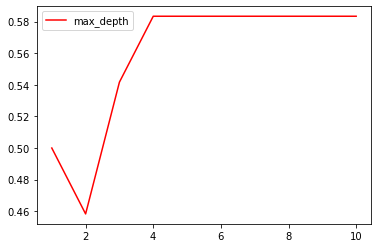

In [39]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = DecisionTreeClassifier(max_depth=i+1
                                ,criterion="entropy"
                                ,random_state=30
                                ,splitter="random"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [134]:
#返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([1, 1, 1, 3, 1, 3, 3, 1, 3, 5, 6, 1, 1, 3, 1, 6, 1, 3, 1, 5, 5, 1,
       6, 1], dtype=int64)

In [135]:
#返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 2., 2., 0., 0., 1., 0., 2., 0.,
       1., 0., 2., 2., 0., 2., 0.])

In [136]:
Ytest

066    0.0
011    0.0
005    0.0
019    1.0
051    0.0
40R    1.0
001    1.0
71     0.0
023    1.0
003    3.0
015    3.0
021    0.0
027    0.0
004    1.0
061    0.0
035    2.0
063    0.0
018    1.0
045    0.0
043    2.0
025    2.0
033    0.0
007    2.0
065    0.0
Name: sensity, dtype: float64